#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
import numpy as np
import pandas as pd
import random

In [3]:
np.random.seed(46)
X = np.random.randint(10, size=(3, 4))
Y = np.random.randint(10, size=(3, 4))
print(np.concatenate((X, Y), axis=0))
print(np.concatenate((X, Y), axis=1))

[[5 8 4 3]
 [2 0 2 8]
 [0 7 6 2]
 [2 2 2 6]
 [7 8 8 6]
 [0 2 4 8]]
[[5 8 4 3 2 2 2 6]
 [2 0 2 8 7 8 8 6]
 [0 7 6 2 0 2 4 8]]


Is equivalent as below: 


In [4]:
random_seed = 46
torch.manual_seed(random_seed)
X=torch.rand(4, 3) 
Y=torch.rand(4, 3)
print(torch.cat([X, Y], dim=0)) 
print(torch.cat([X, Y], dim=1))

tensor([[0.6611, 0.0600, 0.5174],
        [0.1596, 0.7550, 0.8390],
        [0.0674, 0.4631, 0.1477],
        [0.3597, 0.9328, 0.0170],
        [0.9736, 0.4108, 0.8620],
        [0.8799, 0.6569, 0.8152],
        [0.4810, 0.7388, 0.0312],
        [0.7049, 0.7364, 0.1079]])
tensor([[0.6611, 0.0600, 0.5174, 0.9736, 0.4108, 0.8620],
        [0.1596, 0.7550, 0.8390, 0.8799, 0.6569, 0.8152],
        [0.0674, 0.4631, 0.1477, 0.4810, 0.7388, 0.0312],
        [0.3597, 0.9328, 0.0170, 0.7049, 0.7364, 0.1079]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [5]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:

In [6]:
%pip install matplotlib-inline
%matplotlib inline
import random
import torch
from d2l import torch as d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # Returns a tensor of random numbers drawn from separate normal distributions In this case mean=0, sd=1, size=(num_example,len(w))
    y = torch.matmul(X, w) + b # Matrix product of two tensors.
    y += torch.normal(0, 0.01, y.shape) # Add random numbers(size=y.shape) from N(0,0.01) to y cumulatively
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3492, -0.7808]) 
label: tensor([5.6051])


In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0,num_examples, batch_size): # Question : start-point - from zero or one?? 
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) 
        yield features[batch_indices], labels[batch_indices] # Yielding small batches of the batch_size 

In [10]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1896,  0.0169],
        [-1.2948,  0.7414],
        [-0.3097,  0.9962],
        [-1.9135,  0.2393],
        [ 0.1214,  0.7139],
        [ 1.0058, -0.1605],
        [ 2.3917,  1.5185],
        [-0.4218,  0.4144],
        [-1.1742,  1.2932],
        [ 1.3225,  1.6070],
        [ 0.0487, -1.2301],
        [ 1.3465, -0.6140],
        [ 1.7988, -0.2754],
        [ 0.8467,  1.1381],
        [ 1.3625,  0.9923],
        [-0.6340, -1.7870],
        [-0.6581, -0.4724],
        [ 1.6068, -0.0942],
        [ 0.1596,  0.9309],
        [ 2.1447,  1.7118]]) 
 tensor([[ 1.8948],
        [ 0.5017],
        [ 3.0921],
        [-0.6002],
        [ 4.7889],
        [ 8.7529],
        [10.4082],
        [ 3.6125],
        [ 0.0440],
        [ 7.0358],
        [ 7.5086],
        [10.4578],
        [11.3138],
        [ 6.3358],
        [ 8.1006],
        [ 6.2814],
        [ 4.2242],
        [10.4837],
        [ 4.5815],
        [ 9.3723]])


In [11]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([6]) #원하는 실수를 넣어주세요 ;6

In [12]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기 ; torch.matmul -> matrix product

In [13]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y) ** 2 / 2 ###loss function 직접 짜보기

In [14]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad(): # Context-manager that disabled gradient calculation/ Disabling gradient calculation is useful for inference
        for p in params:
            p -= lr * p.grad / batch_size # lr*gradient / batch_size
            p.grad.zero_() # zero_grad()=Sets the gradients of all optimized torch.Tensor s to zero.
            return

In [15]:
lr = 0.1
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.125155
epoch 2, loss 0.125106
epoch 3, loss 0.125312
epoch 4, loss 0.125477
epoch 5, loss 0.125010
epoch 6, loss 0.125785
epoch 7, loss 0.126998
epoch 8, loss 0.125227
epoch 9, loss 0.126391
epoch 10, loss 0.125083


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0058, -0.0009], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.5000])


+cost graph 그리기 (x축 w, y축 loss)

In [17]:
import matplotlib.pyplot as plt

In [70]:
w1 = []
w2 = []
loss_cores_w1 = []
loss_cores_w2 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        w1.append(w.tolist()[0])
        w2.append(w.tolist()[1])
        loss_cores_w1.append(train_l[0].mean())
        loss_cores_w2.append(train_l[1].mean())


In [19]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.5.1-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all 

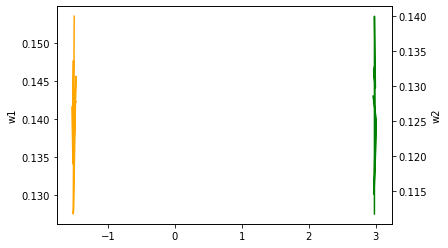

In [22]:
fig, ax_left = plt.subplots()
ax_left.plot(w1, loss_cores_w1, label='Loss corresponding to w1', color='green')
ax_left.set_ylabel('w1')
ax_right = ax_left.twinx()
ax_right.plot(w2, loss_cores_w2, label='Loss corresponding to w2', color='orange')
ax_right.set_ylabel('w2')

plt.show()

**뭔가 이상...**

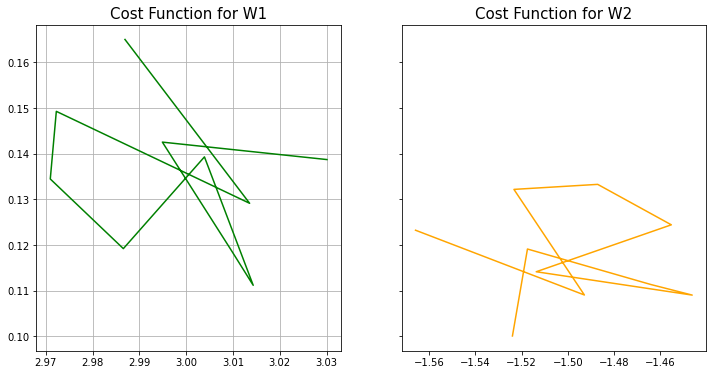

In [71]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                  sharey=True, figsize=(12,6))
ax1.plot(w1, loss_cores_w1, label='Loss corresponding to w1', color='green')
ax1.grid()
ax1.set_title('Cost Function for W1', fontsize=15)
ax2.plot(w2, loss_cores_w2, label='Loss corresponding to w2', color='orange')
ax2.set_title('Cost Function for W2', fontsize=15)

plt.show()


더 이상.. 

concise implementation of linear regression 
- api 사용해보기

In [72]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [73]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [74]:
next(iter(data_iter))

[tensor([[-1.1271, -0.6926],
         [ 1.2841,  0.3493],
         [ 0.5748, -1.3281],
         [-0.8059, -0.9996],
         [-0.6741,  1.4749],
         [-1.0280,  0.7058],
         [ 0.5912, -0.0552],
         [-0.4261,  0.4935],
         [ 1.4275,  0.1699],
         [-0.6542,  0.5083],
         [ 0.6821,  0.4491],
         [ 1.1800,  1.2051],
         [ 1.0813, -1.2411],
         [ 0.3234, -1.2534],
         [ 0.0160,  0.2909],
         [ 0.1029,  1.0980],
         [ 0.4107, -0.8231],
         [-0.7909,  0.4459],
         [-0.6529, -0.3494],
         [-0.2338,  0.6227]]), tensor([[ 3.1500],
         [ 8.8285],
         [ 9.2126],
         [ 4.6024],
         [ 1.2743],
         [ 1.3450],
         [ 7.3620],
         [ 3.4923],
         [ 9.5303],
         [ 2.7758],
         [ 6.8615],
         [ 7.2297],
         [10.6125],
         [ 8.3552],
         [ 5.1080],
         [ 4.1699],
         [ 7.9718],
         [ 2.4619],
         [ 4.0672],
         [ 3.8821]])]

In [75]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [76]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [77]:
loss = nn.MSELoss()

In [78]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [79]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000258
epoch 2, loss 0.000104
epoch 3, loss 0.000105


In [80]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0004, -0.0008])
error in estimating b: tensor([0.0005])
